In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error,explained_variance_score,mean_squared_log_error,r2_score,f1_score
import seaborn as sns

            Fechamento
Data                  
01-01-2015      314.25
02-01-2015      315.03
03-01-2015      281.08
04-01-2015      264.20
05-01-2015      274.47


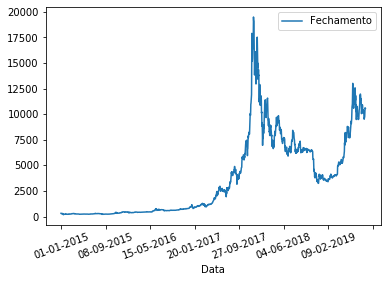

In [15]:
data = pd.read_csv('../Files tcc/data.csv',index_col=['Data'])
print(data.head())
data.plot()
plt.xticks(rotation=20)
plt.savefig("data.png")

In [16]:
df = data[['Fechamento']]
dataset = df.values
dataset = dataset.astype('float32')
dataset

array([[  314.25],
       [  315.03],
       [  281.08],
       ...,
       [10623.54],
       [10594.49],
       [10575.53]], dtype=float32)

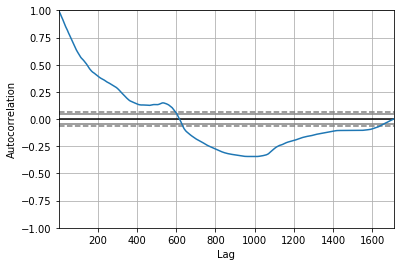

In [17]:
autocorrelation_plot(dataset)

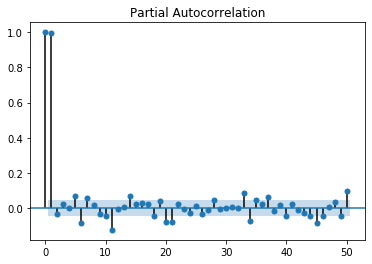

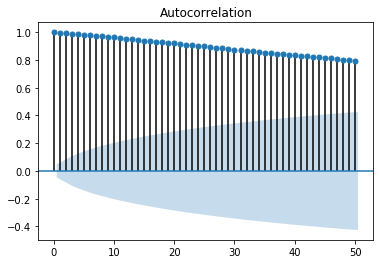

In [18]:
plot_pacf(dataset,lags=50)
plot_acf(dataset,lags = 50)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1708
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12100.024
Method:                       css-mle   S.D. of innovations            288.698
Date:                Mon, 03 Aug 2020   AIC                          24208.048
Time:                        15:53:01   BIC                          24229.820
Sample:                             1   HQIC                         24216.106
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0076      7.211      0.833      0.405      -8.125      20.140
ar.L1.D.y     -0.7300      0.081     -8.961      0.000      -0.890      -0.570
ma.L1.D.y      0.7857      0.073     10.791      0.0

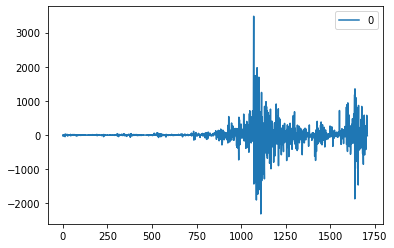

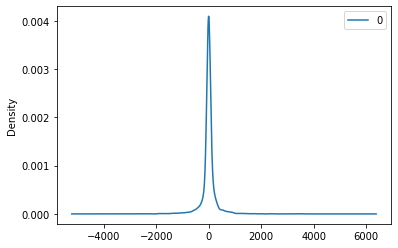

                 0
count  1708.000000
mean     -0.000839
std     288.782070
min   -2318.094915
25%     -17.319718
50%      -4.394954
75%      22.811840
max    3479.485440


In [19]:
modelo = ARIMA(dataset, order=(1,1,1))
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())
residuals = pd.DataFrame(modelo_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [20]:
X = dataset
size = int(len(X) *0.7)
train, teste = X[0:size], X[size:len(X)]
dia_atras = X[size-1:len(X)-1]
historia = [x for x in train]
predicoes = list()
print(len(train),len(teste))

1196 513


In [21]:
for t in range(len(teste)):
    modelo = ARIMA(historia,order=(1,1,1))
    modelo_fit= modelo.fit(disp=0)
    output = modelo_fit.forecast()
    yhat = output[0]
    predicoes.append(yhat)
    obs = teste[t]
    historia.append(obs)
error = mean_squared_error(teste,predicoes)
print('Teste MSE: %.3f' % error)

Teste MSE: 85780.349


In [22]:
resultado = pd.DataFrame(teste,columns=['Esperado'])
resultado['Predito'] = np.asarray(predicoes)
resultado.index = data.tail(513).index

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE: 97.493
Desvio: 2.507347
MSE: 85780.349
RMSE: 292.883
MAE: 180.558
MSLE: 0.001
R2 score: 98.456
Explaine Variance Score: 98.456


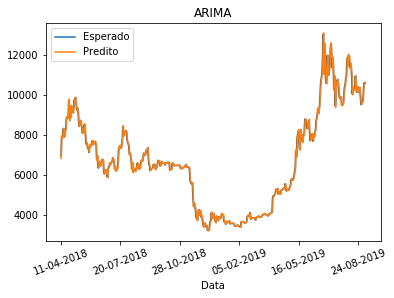

In [24]:
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(teste,predicoes)))
print("Desvio: %3f"%mean_absolute_percentage_error(teste,predicoes))
print("MSE: %.3f"%mean_squared_error(teste,predicoes))
print("RMSE: %.3f"%sqrt(mean_squared_error(teste,predicoes)))
print("MAE: %.3f"%mean_absolute_error(teste,predicoes))
print("MSLE: %.3f"%mean_squared_log_error(teste,predicoes))
print("R2 score: %.3f"%(r2_score(teste,predicoes)*100))
print("Explaine Variance Score: %.3f"%(explained_variance_score(teste,predicoes)*100))
resultado.plot()
plt.xticks(rotation=20)
plt.title('ARIMA')
plt.savefig('Arima_teste.png')

In [78]:
entrada = np.array([[7463.11,7761.24,7569.63]])
fechamentohoje = [7424.29]
tam = np.arange(10000)

Predição de um dia em especifico
MAPE: 57.191
Desvio: 42.809
RMSE: 3178.276
Fechamento [7424.29]
Predito [10602.5655091]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

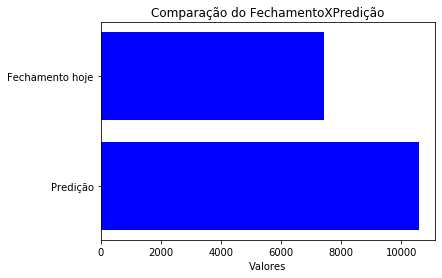

In [83]:
predicaohoje = modelo_fit.forecast()[0]
print("Predição de um dia em especifico")
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,predicaohoje)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,predicaohoje))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,predicaohoje)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%predicaohoje)

vetorgrafico = { "Predição": predicaohoje[0] , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')
